## Week 6: Assignment

## K-means Clustering

In [1]:
#Import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**(1a) Load the data file 'kmc-data1.csv' and visualize the data.**

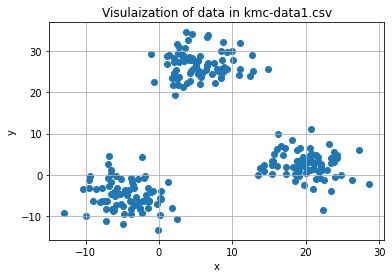

In [2]:
# Write code here

dataset = np.loadtxt('kmc-data1.csv',delimiter=',')#,dtype={'names':('x','y'),'formats':('f4','f4')})

plt.scatter(dataset[:,0],dataset[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Visulaization of data in kmc-data1.csv')
plt.show()

**(1b) Consider the case where K=1. Take centre as $[6.67,8.33]$ and calculate Within Cluster Sum of Squares (WCSS)**

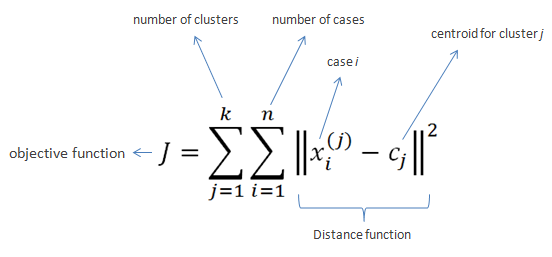

In [3]:
# Write code here
c = np.array([[6.67,8.33]])

wcss = np.sum((dataset - c)**2)
print('With in cluster Sum of squares for k=1 and center = (6.67 , 8.33) is :',wcss)

With in cluster Sum of squares for k=1 and center = (6.67 , 8.33) is : 73409.43272669788


**(1c) Write a function to find which class each point belongs to given the centroids and value of K**

Hint: data has dimensions (m x n), centroids has dimensions (K x n)

In [4]:
import numpy as np
def get_class(data,centroids,K):
    size = data.shape[0]
    data_class = np.zeros([size]) #Create an array to store classes of each data
    #Your code here
    dist_arr = []
    for i in range(K) :
        dist_arr.append(np.sum((data - centroids[i,:])**2,axis = 1))
        
    array_dist = np.array(dist_arr)
    for i in range(data_class.shape[0]) :
        data_class[i] = np.argmin(array_dist[:,i])
    return(data_class)

**(1d) Write a function to find the centroids given the data points and the corresponding class**

In [17]:
def get_centroids(data,data_class,K):
    dim = data.shape[1] #The number of columns in data
    centroids = np.zeros((K,dim))
    #Your code here
    for i in range(K) :
        data_k = data[np.where(data_class == i)[0],:]
        if data_k.shape[0] > 0 :
            centroids[i,:] = np.sum(data_k , axis = 0 )/data_k.shape[0]
    return(centroids)

**(1e) Write a function to calculate WCSS given the data points, the centroids and K** 

In [18]:
def wcss(data,centroids,K):
    wcss_clusterwise = np.zeros([K]) #Array to store WCSS of individual clusters
    #Your code here
    dist_arr = []
    for i in range(K) :
        dist_arr.append(np.sum((data - centroids[i,:])**2,axis = 1))
    array_dist = np.array(dist_arr)
    
    for i in range(K) :
        wcss_clusterwise[i] = np.sum(np.min(array_dist,axis=0))
    wcss = np.sum(wcss_clusterwise) 
    return(wcss)

**K Means Algorithm:<br>**
    1) Allocate a class to each data point given the initial centroids<br>
    2) Calculate the new centroids,i.e, the mean of the data points in each class<br>
    3) Iterate till the stopping criteria. In our case the algorithm stops when the shift in each centroid is less than tolerance<br>
    

**(1f) Let $K = 3$ and the initial cluster centroids be $[10,30], [25,-5]$ and $[-5,10]$ and write a function to implement K-means clustering using functions defined above. Plot the final clusters with K-means clustering.<br> Take tolerance as $0.001$**

In [19]:
np.random.seed(42)
def kmeans(data,K,centroids):
    wcss_list = []
    while True :
        prev_centroids = centroids
        data_class = get_class(data,centroids,K)
        centroids = get_centroids(data,data_class,K)
        wcss_list.append(wcss(data,centroids,K))
        if np.max(np.sum((centroids - prev_centroids)**2 , axis = 1)) <= 1e-3 :
            break
    return wcss_list,centroids        
    # Write code here

a,b = kmeans(dataset,3,np.array([[10,30],[25,-5],[-5,10]])) 

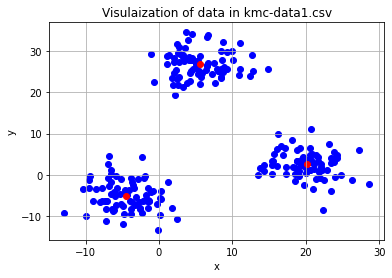

In [20]:
plt.scatter(dataset[:,0],dataset[:,1],c='blue')
plt.scatter(b[:,0],b[:,1],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Visulaization of data in kmc-data1.csv')
plt.show()

**(1g) Compute the sum of square distance of each point from the cluster centroid.**

In [21]:
#  Write code here
print('WCSS for the calculated centroids is :',a[-1])

WCSS for the calculated centroids is : 14810.166691479279


**(1h) Repeat the above exercise for $K = 1,2,3,4$. You can use appropriate initial centroids based on the visualization**

**Plot the final clusters (for $K = 1,2,3,4$) and report the sum of square distance of each point from the cluster mean. Give your observations.**

In [22]:
#  Write code here
np.random.seed(4)
K = [1,2,3,4]

kmeans_centroids = {}

for k in K :
    centroids = np.random.randn(k,dataset.shape[1])
    a,b = kmeans(dataset,k,centroids)
    kmeans_centroids[k] = b
    print('For K=',k,'WCSS :',a[-1])

For K= 1 WCSS : 73354.85577801635
For K= 2 WCSS : 62982.876202911524
For K= 3 WCSS : 14810.166691479279
For K= 4 WCSS : 16982.13477853036


We can see that with increase in K values, the WCSS decreases initially, reaches an optimal value and then increases again. As we can see from the visualization of the graph above, there are 3 clusters and we get the minimal value of K for K =3.

**(2a) Load the data from the file 'kmc-data2.csv' and visualize the data on a scatter plot.**

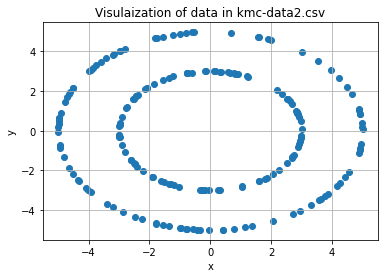

In [23]:
#  Write code here
dataset = np.loadtxt('kmc-data2.csv',delimiter=',')

plt.scatter(dataset[:,0],dataset[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Visulaization of data in kmc-data2.csv')
plt.show()

**(2b) Cluster the data with K-means clustering. Consider $K = 2$. (You can use scikit-learn library for to perform clustering)**

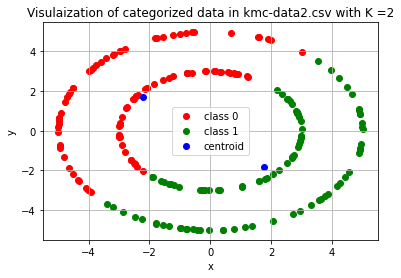

In [24]:
#  Write code here
from sklearn.cluster import KMeans

kmean = KMeans(2)
kmean.fit(dataset)

centroids = kmean.cluster_centers_

data_class = kmean.predict(dataset)
data_0 = dataset[np.where(data_class == 0),:][0]
data_1 = dataset[np.where(data_class == 1),:][0]

plt.scatter(data_0[:,0],data_0[:,1],c='red',label ='class 0')
plt.scatter(data_1[:,0],data_1[:,1],c='green',label ='class 1' )
plt.scatter(centroids[:,0],centroids[:,1],c='blue',label ='centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.title('Visulaization of categorized data in kmc-data2.csv with K =2')
plt.show()

**(2c) Suppose you want to identify two ring clusters as visualised in the scatter plot. Now, transform the data such that K-means clustering identifies the two ring clusters.**

Hint: The points in the inner circle have the same radius and so do the points on the outer circle. This can be an effective way to cluster those points. Now think of transforming the 2D data to 1D data and then cluster.

In [29]:
#  Write code here

data_1d = np.sqrt(np.sum(dataset**2,axis = 1)).reshape((-1,1))

kmean_1d = KMeans(2)
kmean_1d.fit(data_1d)

centroids_1d = kmean_1d.cluster_centers_
print('As expected, since the data is in 2 circles, i.e. radius of 3 and 5, we can transform it into 1D using z = x^2 +y^2. The centroids using the corresponding transform are :',centroids_1d.ravel(),'This is as expected 3,5')

As expected, since the data is in 2 circles, i.e. radius of 3 and 5, we can transform it into 1D using z = x^2 +y^2. The centroids using the corresponding transform are : [5. 3.] This is as expected 3,5


**(3) Perform K-means clustering on Bank note dataset (attached) which is a classification dataset. Split the data into test and train (80:20 ratio with random seed=0). Perform clustering on the training data and predict labels for test data based on the clusters obtained. Compare the predictions with actual labels and report accuracy. (You can use scikit-learn library for K-means and train-test split and accuracy)**

In [52]:
#  Write code here
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

dataset = np.loadtxt('data_banknote_authentication.csv',delimiter=',')
X_train , X_test , y_train , y_test = train_test_split(dataset[:,:-1],dataset[:,-1],test_size = 0.2,random_state=0)

kmean_bank = KMeans(2)
kmean_bank.fit(X_train,y_train)
print('Accuracy on test data :',accuracy_score(y_test , kmean_bank.predict(X_test)))

Accuracy on test data : 0.6763636363636364


## Logistic Regression

Logistic Regression uses the sigmoid function for binary classification. 

**(4a) Plot the sigmoid function $\frac{1}{1+e^{-x}}$ for x in the range [-20,20] at 100 equally spaced values. This exercise will help you understand the shape of the sigmoid function and show its relevance in binary classification problems**

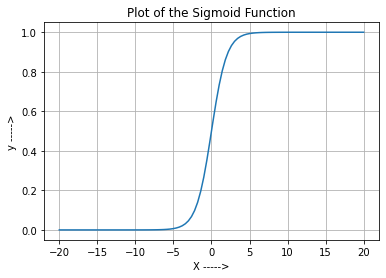

In [35]:
# Code here
import matplotlib.pyplot as plt

x = np.linspace(-20,20,100)
plt.plot(x , 1/(1+np.exp(-x)))
plt.grid()
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.title('Plot of the Sigmoid Function')
plt.show()

**(4b) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs).**

Domain of the Sigmoid function is the real axis. 
Range of the Sigmmoid function is [0,1]
For inputs which have very high positive value, the Sigmoid function tends to saturate to the value 1 whereas for inputs which have very high negative values, the Sigmoid function saturates to the value of zero. This behaviour is evident from the graph above.

**(4c) Using the derivative formula of sigmoid function, plot the gradients of the sigmoid function for the 100 values in the range [-20,20].**

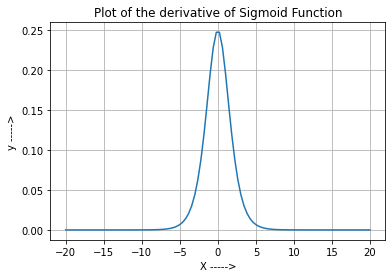

In [36]:
# Code here
def sigmoid(x) :
    return 1/(1+np.exp(-x))
def der_sigmoid(x) :
    return sigmoid(x)*(1-sigmoid(x))

X = np.linspace(20,-20,100)
y = der_sigmoid(X)

plt.plot(X,y)
plt.grid()
plt.xlabel('X ----->')
plt.ylabel('y ----->')
plt.title('Plot of the derivative of Sigmoid Function')
plt.show()

**Consider the given data X_logistic.txt and y_logistic.txt. Perform random shuffle and then split the data as train-validation-test sets in the ratio of 80:10:10. Note that the y value gives the class label (0 or 1).** 

**(5a) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 by using validation dataset. Using the chosen model (best learning rate and number of iterations), report the prediction accuracy on test data. Use a random initialization of weights.**



In [55]:
# Code here
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

class logistic_regression :
    def __init__(self,dim) :
        self.weights = np.random.randn(dim).reshape(-1,1)
    
    def forward(self,X) :
        ######## Calculating the for one iteration
        Z = np.dot(X,self.weights)
        return self.sigmoid(Z)
    
    def backward(self,X,y) :
        gradient = np.dot(X.T , self.sigmoid(np.dot(X,self.weights))-y.reshape(-1,1))/X.shape[0] 
        return gradient
    
    def gradient_descent(self,X_train,y_train,X_val,y_val,lr,max_iter):
        for i in range(max_iter) :    
            Z = self.forward(X_train)
            grad = self.backward(X_train,y_train)
            #if i%10 == 0 :
            #    print('Epoch :',i,'Validation Accuracy :',self.accuracy(X_val,y_val))
            self.weights = self.weights - lr * grad.reshape(-1,1)
        
    def sigmoid(self,X) :
        return 1/(1+np.exp(-X))
    def accuracy(self,X_val,y_val) :
        y_pred = self.forward(X_val)
        y_pred = y_pred > 0.5
        return np.sum(y_val.reshape(-1,1) == y_pred)/y_val.shape[0]
    def predict(self,X) :
        y = self.forward(X)
        for i in range(y.shape[0]) :
            if y[i,0] > 0.5 :
                y[i,0] = 1
            else :
                y[i,0] = 0
        return y        
        
X = np.loadtxt('X_logistic.txt')
y = np.loadtxt('y_logistic.txt')

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.1,random_state = 42,shuffle = True)
X_train , X_val , y_train , y_val = train_test_split(X_train,y_train,test_size = 1/9,random_state = 42,shuffle=True)

In [56]:
# Report accuracy 
X_train_intercept = np.concatenate([np.ones((X_train.shape[0],1)) , X_train] , axis = 1)
X_val_intercept = np.concatenate([np.ones((X_val.shape[0],1)) , X_val] , axis = 1)
X_test_intercept = np.concatenate([np.ones((X_test.shape[0],1)) , X_test] , axis = 1)

for lr in [0.1,0.01,0.001] :
    for iters in [50,100,1000] :
        clf = logistic_regression(3)
        clf.gradient_descent(X_train_intercept,y_train,X_val_intercept,y_val,lr,iters)
        print('For Learning Rate :',lr,'Iterations :',iters,'Validation Accuracy :',clf.accuracy(X_val_intercept,y_val))

For Learning Rate : 0.1 Iterations : 50 Validation Accuracy : 1.0
For Learning Rate : 0.1 Iterations : 100 Validation Accuracy : 0.9
For Learning Rate : 0.1 Iterations : 1000 Validation Accuracy : 0.9
For Learning Rate : 0.01 Iterations : 50 Validation Accuracy : 0.8
For Learning Rate : 0.01 Iterations : 100 Validation Accuracy : 0.9
For Learning Rate : 0.01 Iterations : 1000 Validation Accuracy : 1.0
For Learning Rate : 0.001 Iterations : 50 Validation Accuracy : 0.4
For Learning Rate : 0.001 Iterations : 100 Validation Accuracy : 0.4
For Learning Rate : 0.001 Iterations : 1000 Validation Accuracy : 1.0


In [59]:
clf_opt = logistic_regression(3)
clf_opt.gradient_descent(X_train_intercept,y_train,X_val_intercept,y_val,0.01,1000)
print('Accuracy on test data for lr = 0.01, iters = 1000 :',clf.accuracy(X_test_intercept,y_test))

Accuracy on test data for lr = 0.01, iters = 1000 : 1.0


We can see from the results above that for value of learning rate = 0.1, as the number of iterations increase, the validation accuracy slightly decreases. This could be owing to the fact that the learning rate is too high and that the classifier is oscillating about the optimal point.

In case of learning rate = 0.01, we can see that the model quickly converges to an higher accuracies and there is no decrease in accuracy as in learning rate = 0.1. Hence, we can consider this as an optimal learning rate and can choose the max iterations as 1000. 

In case of learning rate  = 0.001, we see that the model doesn't converge until large number of iterations. Hence, we can choose learning rate = 0.01.

**(5b) Plot the logistic regression classifier (decision boundary) on a 2d plot and include the train and test datapoints on the plot in different colours.
(Say dark green for class 0 test datapoints and dark red for class 1 test datapoints. Similarly, light green and light red for train datapoints).**

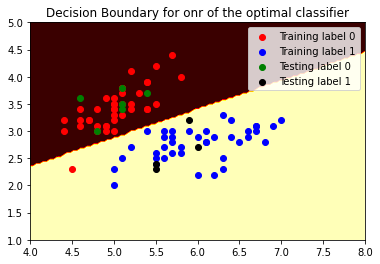

In [60]:
# Code here
clf_opt = logistic_regression(3)
clf_opt.gradient_descent(X_train_intercept,y_train,X_val_intercept,y_val,0.01,1000)

import matplotlib.pyplot as plt
x,y = np.meshgrid(np.linspace(4,8,100),np.linspace(1,5,100))

data_3d = np.concatenate([np.ones((10000,1)),x.flatten().reshape(-1,1),y.flatten().reshape(-1,1)],axis = 1)

y_pred = clf_opt.predict(data_3d)
plt.contourf(np.linspace(4,8,100),np.linspace(1,5,100),y_pred.reshape(100,100),cmap = 'hot')
plt.scatter(X_train[y_train == 0][:,0],X_train[y_train == 0][:,1],c='red',label = 'Training label 0')
plt.scatter(X_train[y_train == 1][:,0],X_train[y_train == 1][:,1],c='blue',label='Training label 1')
plt.scatter(X_test[y_test == 0][:,0],X_test[y_test == 0][:,1],c='green',label='Testing label 0')
plt.scatter(X_test[y_test == 1][:,0],X_test[y_test == 1][:,1],c='black',label = 'Testing label 1')
plt.legend()
plt.title('Decision Boundary for onr of the optimal classifier')
plt.show()

**(6) Consider the bank note dataset provided. Perform random shuffle and train-test split(80:20). Using sklearn, implement logistic regression to predict whether the test datapoints belong to class 0 or 1. Report the prediction accuracy on test data.**

In [61]:
# Code here
import numpy as np
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
data_banknote = np.loadtxt('data_banknote_authentication.csv',delimiter=',')

X_train , X_test , y_train , y_test = train_test_split(dataset[:,:-1],dataset[:,-1],test_size = 0.2,random_state=0)

clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [62]:
# Report accuracy here
print('Accuracy on test data is :',clf.score(X_test,y_test))

Accuracy on test data is : 0.9927272727272727
